In [121]:
%load_ext autoreload
%autoreload 2

# Autoreload is important, otherwise .py scripts won't be reloaded after changes.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
import data_loader
import columns

from common_plots import plot_survived_by_category

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
loader = data_loader.DataLoader()

train_set, test_set = loader.get_data()

In [123]:
train_set.shape, test_set.shape

((891, 12), (418, 11))

In [124]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [125]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
train_set[train_set[columns.CABIN].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [127]:
# This is filtering using boolean indices - train_set[columns.SEX] == 'male' returns a vector of True/False values,
# but still with full length. We later use those values to return SURVIVED values only where filtering operation returned true,
# therefore shortening resulting series.
# We use sort_index() to get the same order by SURVIVED values.

# We use normalize to show the relative frequency to all of the values, aka percentage.
males_mask = train_set[columns.SEX] == 'male'
survived_males_count = train_set[columns.SURVIVED][males_mask].value_counts(normalize=True).sort_index()

females_mask = train_set[columns.SEX] == 'female'
survived_females_count = train_set[columns.SURVIVED][females_mask].value_counts(normalize=True).sort_index()

class1_mask = train_set[columns.P_CLASS] == 1
class2_mask = train_set[columns.P_CLASS] == 2
class3_mask = train_set[columns.P_CLASS] == 3

class1_count = train_set[columns.SURVIVED][class1_mask].value_counts(normalize=True).sort_index()
class2_count = train_set[columns.SURVIVED][class2_mask].value_counts(normalize=True).sort_index()
class3_count = train_set[columns.SURVIVED][class3_mask].value_counts(normalize=True).sort_index()

In [139]:
unique_sib_sp_values = np.sort(train_set[columns.SIB_SP].unique())

sib_sp_masks = [train_set[columns.SIB_SP] == x for x in unique_sib_sp_values]

sib_sp_counts = [train_set[columns.SURVIVED][mask].value_counts().sort_index() for mask in sib_sp_masks]
sib_sp_counts_normalized = [train_set[columns.SURVIVED][mask].value_counts(normalize=True).sort_index() for mask in sib_sp_masks]

unique_sib_sp_values

array([0, 1, 2, 3, 4, 5, 8])

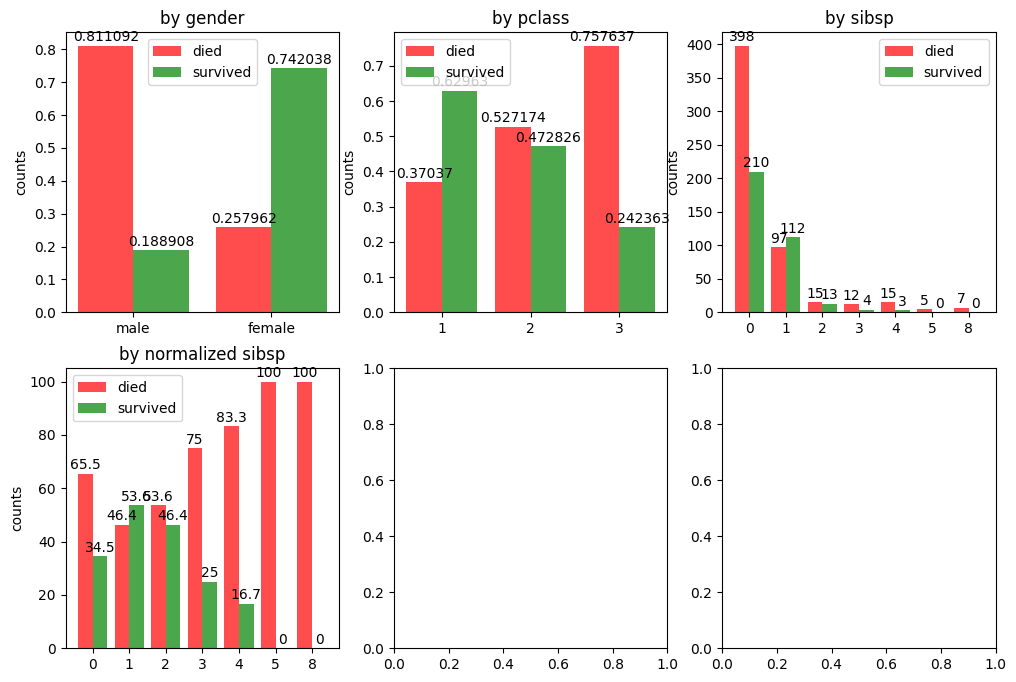

In [140]:
plot_survived_by_category([
  ('by gender', train_set[columns.SEX].unique(), [survived_males_count, survived_females_count]),
  ('by pclass', [1, 2, 3], [class1_count, class2_count, class3_count]),
  ('by sibsp', unique_sib_sp_values, sib_sp_counts),
  ('by normalized sibsp', unique_sib_sp_values, sib_sp_counts_normalized)
])


## Conclusions
- 74% females survived, while only 19% of the man did
- 75% of class 3 passengers died, while only 37% of the 1 class passengers did